# MTH 651: Advanced Numerical Analysis

## Lecture 9

Let $a(\cdot,\cdot) : V \times V \to \mathbb{R}$ be a symmetric, continuous, and coercive bilinear form.
Let $V_h$ be a finite-dimensional subspace of $V$ with basis $\{ \phi_1, \ldots, \phi_N \}$, and let $A$ be the matrix associated with $a(\cdot, \cdot)$,
$$
    A_{ij} = a(\phi_i, \phi_j).
$$

Note that $A$ is symmetric.

> **_DEFINITION:_** A symmetric matrix $A$ is called **positive definite** if
>
> * $v^T A v \geq 0$ for all $v$
> * $v^T A v = 0$ only when $v = 0$
>
> If only the first condition holds, the matrix is called **positive semidefinite**

> **_PROPOSITION:_** $A$ is positive definite. (Why)?

> **_PROPOSITION:_** A symmetric matrix $A$ is positive definite iff all of its eigenvalues are positive.

First, we should recall that a symmetric matrix (Hermetian, even) has only real eigenvalues.

To see this, suppose $A^* = A$, and let $A v = \lambda v$.
Then, $v^* A v = \lambda v^* v = \lambda \| v \|^2$, and
$$
    \lambda^* \| v \|^2 = (v^* A v)^* = v^* A^* v = v^* A v = \lambda \| v \|^2,
$$
so $\lambda = \lambda^*$ and $\lambda \in \mathbb{R}$.

Now, suppose $A$ is positive definite.
Let $v$ be an eigenvector.
Then,
$$
    0 < v^T A v = \lambda \| v \|^2,
$$
so $\lambda > 0$.

Now, suppose that $A$ has only positive eigenvalues.
Then, by the spectral theorem,
$$
    A = Q^T \Lambda Q,
$$
where $Q$ is orthogonal (i.e. $Q^T = Q^{-1}$), and $\Lambda = \operatorname{diag}(\lambda_1, \lambda_2, \ldots, \lambda_n)$.
Then, for any $v$, let $w = Q v$, i.e. $v = Q^{-1} w$.
So,
$$
    v^T A v = (Q^{-1} w)^T A Q^{-1} w = w^T Q^{-T} Q^T \Lambda Q Q^{-1} w = w^T \Lambda w > 0
$$

The fact that $A$ is SPD (symmetric and positive definite) makes the linear system of equations
$$
    A \boldsymbol u = \boldsymbol F
$$
much easier to solve.
Such systems are more amenable to solution by numerical methods, both direct and iterative.
In particular,

* Direct: can use Cholesky instead of LU
* Iterative:
    * Gauss-Seidel
    * (Better:) (preconditioned) conjugate gradient

### Stationary Methods

Let $A$ be a given matrix.
We want to solve
$$
    A x = b
$$
for some right-hand side $b$.
Suppose we cannot invert $A$ (e.g. because it is too large).

There are a class of **iterative methods** for approximating the solution $x$ called **stationary methods**.
These methods are based on the general iteration
$$
    x^{(i+1)} = x^{(i)} + B(b - A x^{(i)})
$$
for some **fixed** non-singular matrix $B$.

We can consider this as a fixed-point iteration
$$
    x^{(i+1)} = \Phi(x^{(i)}),
$$
where the iteration operator $\Phi$ is defined by
$$
    \Phi(z) = z + B(b - A z).
$$

Suppose $x$ is a fixed point of $\Phi$, i.e. $\Phi(x) = x$.
Then,
$$
    x = x + B(b - A x)
$$
and we obtain
$$
    B A x = B b,
$$
and (since $B$ is nonsingular), this implies that
$$
    Ax = b,
$$
and $x$ is the solution to our problem.

Therefore, solving the problem $Ax = b$ is equivalent to finding a fixed point of $\Phi$.

The iteration
$$
    x^{(i+1)} = \Phi_B(x^{(i)}),
$$
converges to a fixed point of $\Phi_B$ .

We know that if $\Phi_B$ is a **contraction mapping**, then this iteration will converge to the unique fixed point.

> **_RECALL:_** We say $\Phi_B$ is **contraction mapping** if it brings any two points "closer together," i.e., for any $x$ and $y$
> $$
>   \| \Phi_B(x) - \Phi_B(y) \| \leq c \| x - y \|,
> $$
> with $c < 1$.

Note that our operator is $\Phi_B : z \mapsto z + B(b - Az)$, and so
$$
    \Phi_B(x) - \Phi_B(y) = x + Bb - BAx - y - Bb + BAy = (I - BA)(x - y).
$$
This means that $\Phi_B$ is a contraction mapping whenever the norm or spectral radius of $(I - BA)$ is less than one.

Note that $B$ can be heurtically considered as an approximation to $A^{-1}$.
If $B = A^{-1}$, then the iteration will converge in one step.
For $B \approx A^{-1}$, then the norm $I - BA$, which measures the speed of convergence, will be close to zero, and convergence will be rapid.


### Computational cost

Each iteration of the stationary method is written
$$
    x^{(i+1)} = x^{(i)} + B(b - Ax^{(i)}).
$$
So, each iteration requires a matrix-vector product by $A$, two vector additions/subtractions, and the matrix-vector product (or operator application) with $B$.

If $A$ is represented as a sparse matrix, then the cost of multiplying by $A$ is $\mathcal{O}(nnz)$.

To estimate the cost of the stationary method, we need estimates for the cost of applying $B$ and for the number of iterations.

### Examples of stationary methods

1. Richardson method. Let $\omega > 0$ by a fixed parameter. Set $B = \omega I$.
2. Jacobi method. Let $B = D^{-1}$ where $D$ is the diagonal of $A$.
3. Gauss-Seidel method. Let $B = L^{-1}$ where $L$ is the lower-triangular part of $A$. (We could equally well use the upper triangular part).

#### Gauss-Seidel method

Decompose $A = L + U$, where

* $L$ is lower-triangular
* $U$ is **strictly** upper-triangular (zeros on the diagonal)

The main idea is to approximate $A$ by its lower-triangular part (we could equally well use the upper-triangular part --- in our case, the matrix is symmetric, so it doesn't matter).

We start with an initial guess $x^{(0)}$.
This guess is not in general exact, so we have some **residual**
$$
    r^{(0)} = b - A x^{(0)}
$$

**If** we could invert $A$, and solve for the **error**
$$
    e^{(0)} = A^{-1} r^{(0)}
$$
then we can check
$$
    x = x^{(0)} + e^{(0)}
$$
since
$$
    A (x^{(0)} + e^{(0)}) = A x^{(0)} + r^{(0)} = b.
$$

But, we can approximate $e^{(0)}$ using the lower-triangular part $L$, and then iterate, i.e.
$$
    x^{(1)} = x^{(0)} + L^{-1} r^{(0)}
$$
We can see that this iteration results in
$$
    x^{(1)} = L^{-1} ( b - U x^{(0)} ).
$$
Another way of obtaining the same iteration is to write
$$
    Ax = (L + U) x = b
$$
and split the left-hand side to get
$$
    Lx = b - Ux,
$$
and use the "previous" guess for the right-hand side.

In general, the iteration is
$$
    x^{(i+1)} = L^{-1} ( b - Ux^{(i)})
$$

Consider a simple example of a $3 \times 3$ matrix,
$$
    \begin{pmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33} \\
    \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}
    =
    \begin{pmatrix} b_1 \\ b_2 \\ b_3 \end{pmatrix}.
$$

Suppose we are given an initial guess $(x_1^{(i)}, x_2^{(i)}, x_3^{(i)})$.
Then, the Gauss-Seidel iteration improves on this guess by:

1. Keeping $x_2^{(i)}$ and $x_3^{(i)}$ fixed, and then solving for $x_1^{(i+1)}$.
2. Now we have an improved $x_1^{(i+1)}$, so use $x_1^{(i+1)}$ and $x_3^{(i)}$ to solve for $x_2^{(i+1)}$.
3. Now use the improved values $x_1^{(i+1)}$ and $x_2^{(i+1)}$ to solve for $x_3^{(i+1)}$

This can be written as
$$
    \begin{pmatrix}
    a_{11} & 0 & 0 \\
    a_{21} & a_{22} & 0 \\
    a_{31} & a_{32} & a_{33} \\
    \end{pmatrix}
    \begin{pmatrix} x_1^{(i+1)} \\ x_2^{(i+1)} \\ x_3^{(i+1)} \end{pmatrix}
    + 
    \begin{pmatrix}
    0 & a_{12} & a_{13} \\
    0 & 0 & a_{23} \\
    0 & 0 & 0 \\
    \end{pmatrix}
    \begin{pmatrix} x_1^{(i)} \\ x_2^{(i)} \\ x_3^{(i)} \end{pmatrix}
    =
    \begin{pmatrix} b_1 \\ b_2 \\ b_3 \end{pmatrix}.
$$

It is easy to see that the general form of this iteration is
$$
    L x^{(i+1)} + U x^{(i)} = b,
$$
which is the Gauss-Seidel method.

### Convergence Analysis

We will start with analysis for the case when $B$ is symmetric.
We will then extend the analysis to non-symmetric $B$.

If $B$ is symmetric, then $BA$ is not generally symmetric — at least not in the standard inner product.
However, $BA$ is symmetric in the inner product induced by $A$.
This means that $BA$ has only real eigenvalues.
Consequently,
$$
    \rho(I - BA) = \max\{ |1 - \lambda_{\min}(BA)|, |1-\lambda_{\max}(BA)| \}.
$$
Therefore, the mapping $\Phi_B$ is a contraction if
$$
    0 < \lambda_{\min}(BA) \leq \lambda_{\max}(BA) < 2.
$$

### Symmetrized methods

Let $B$ be given (potentially non-symmetric).
Define the **symmetrized** stationary method by

$$
    \begin{aligned}
        x^{(i+1/2)} &= x^{(i)} + B(b - Ax^{(i)}) \\
        x^{(i+1)} &= x^{(i+1/2)} + B^T(b - Ax^{(i+1/2)}).
    \end{aligned}
$$

Note that this can be expanded as a stationary method with matrix $\bar{B}$,
$$
    x^{(i+1)} = x^{(i)} + \bar{B}(b - Ax^{(i)}).
$$
The mapping $\Phi_{\bar{B}}$ satisfies
$$
    \Phi_{\bar{B}} = \Phi_{B^T} \Phi_{B}.
$$
This iteration will converge if
$$
    I - \bar{B}A = (I - B^TA)(I - BA)
$$
is convergent.
We can see that
$$
    \bar{B} = B + B^T - B^T A B,
$$
from which it can be seen that $\bar{B}$ is symmetric (in the standard inner product).
It follows that $I - \bar{B}A$ is symmetric in the inner product induced by $A$.

So, the eigenvalues of $\bar{B} A$ are real.
Note additionally that $I - \bar{B}A$ is **positive semi-definite**.
This can be seen as follows.
For any matrix $C$, its **adjoint** $C^*$ in the $A$ inner product is
$$
    C^* = A^{-1} C^T A.
$$
This matrix satisfies
$$
    (C^* x, y)_A = y^T A C^* x = y^T A A^{-1} C^T x = (C y)^T A x = (x, Cy)_A.
$$
So, the adjoint of $I - BA$ is
$$
    (I - BA)^* = I - A^{-1}(BA)^T A.
$$
We verify:
$$
    \begin{aligned}
        ((I - BA)^*x, y)_A
            &= y^T A (I - BA)^*x \\
            &= y^T A (I - A^{-1}(BA)^T A) x \\
            &= y^T (A - A^T B^T A) x \\
            &= ( (I - BA) y)^T A x \\
            &= (x, (I - BA) y).
    \end{aligned}
$$
Note that
$$
    (I - BA)^* = I - A^{-1}(BA)^T A = I - B^T A,
$$
and so
$$
    I - \bar{B}A = (I - BA)^* (I - BA).
$$
Let $x$ be an eigenvalue of $(I - \bar{B}A)$.
Then,
$$
    \begin{aligned}
        ((I - \bar{B}A) x, x)_A
            &= (\lambda x, x) = \lambda \|x\|_A^2.
    \end{aligned}
$$
Furthermore,
$$
    \begin{aligned}
        ((I - \bar{B}A) x, x)_A
            &= ((I - BA)^* (I-BA) x, x)_A \\
            &= ((I-BA) x, (I - BA) x)_A \\
            &\geq 0.
    \end{aligned}
$$
This implies that
$$
    \lambda_{\min}(I - \bar{B}A) \geq 0,
$$
which is equivalent to
$$
    1 - \lambda_{\max}(\bar{B}A) \leq 1.
$$

Therefore, we have the following result:

**Lemma.** The symmetrized method $\Phi_{\bar{B}}$ satisfies
$$
    \rho(I - \bar{B}A) = 1 - \lambda_{\min}(\bar{B}A).
$$

**Theorem.** The symmetrized method coverges if and only if
$$
    B^{-1} + B^{-T} - A
$$
is symmetric and positive-definite.

**Proof.**
By the lemma, $\Phi_{\bar{B}}$ converges if and only if $\lambda_{\min}(\bar{B}A) > 0$.
Since $\bar{B}A$ is symmetric in the $A$ inner product, this is equivalent to $\bar{B}A$ being SPD in the $A$ inner product.
That is equivalent to $\bar{B}$ being SPD in the standard inner product.
Recall that
$$
\bar{B} = B + B^T - B^T A B,
$$
and so
$$
\bar{B} = B^T(B^{-T} + B^{-1} - A) B,
$$
which is SPD if and only if $B^{-T} + B^{-1} - A$ is.

For arbitrary $B$ (potentially non-symmetric), then
$$
    \rho(I - BA) \leq \sqrt{\rho(I - \bar{B}A)},
$$
and so $\Phi_B$ converges iff $\Phi_{\bar{B}}$ does.
This can be proven by noting
$$
    \rho(I - BA)^2 \leq \| I - BA \|_A^2 = \| (I - BA)^* (I - BA) \|_A = \rho(I - \bar{B}A)
$$

**Theorem.**
The Richardson method converges if and only if
$$
    0 < \omega < \frac{2}{\lambda_{\max}(A)}.
$$
The optimal choice is given by
$$
    \omega = \frac{2}{\lambda_{\min}(A) + \lambda_{\max}(A)}
$$
and the convergence rate is
$$
    \frac{\kappa(A) - 1}{\kappa(A) + 1}
$$
where $\kappa(A)$ is the **condition number**
$$
    \kappa(A) = \frac{\lambda_{\max}(A)}{\lambda_{\min}(A)}.
$$

**Theorem.** The Jacobi method converges if the matrix $A$ is strictly diagonally dominant.

**Theorem.** The Gauss-Seidel method converges for all SPD $A$.

**Proof.**
For Gauss-Seidel, $B = L^{-1}$, and so
$$
    B^{-T} + B^{-1} - A = D,
$$
which is SPD.

## Computational Example with MFEM

In [2]:
# Import MFEM and GLVis, define a coefficient...

import mfem.ser as mfem
from glvis import glvis

from math import cos, exp, sin

class f(mfem.PyCoefficient):
    def EvalValue(self, xvec):
        x = xvec[0]
        y = xvec[1]
        return exp(0.1*sin(5.1*x - 6.2*y) + 0.3*cos(4.3*x +3.4*y))

In [3]:
# Create the mesh and finite element space
mesh = mfem.Mesh(20, 20, "TRIANGLE")
order_k = 2
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)

# 5. Define the solution x as a finite element grid function in fespace. Set
#    the initial guess to zero, which also sets the boundary conditions.
u = mfem.GridFunction(fe_space)

# Create the right-hand side vector using the linear form F : v -> (f, v)
# This is called a "domain linear form integrator", or DomainLFIntegrator
F = mfem.LinearForm(fe_space)
F.AddDomainIntegrator(mfem.DomainLFIntegrator(f()))
# F.Assemble() tells MFEM to actually compute the entries of the vector F
F.Assemble()

# Set up the bilinear form m(.,.). The L2 inner product is called a
# "mass integrator"
m = mfem.BilinearForm(fe_space)
m.AddDomainIntegrator(mfem.MassIntegrator())
m.Assemble()
m.Finalize()

# Get the matrix associated with the bilinear form
M = m.SpMat()


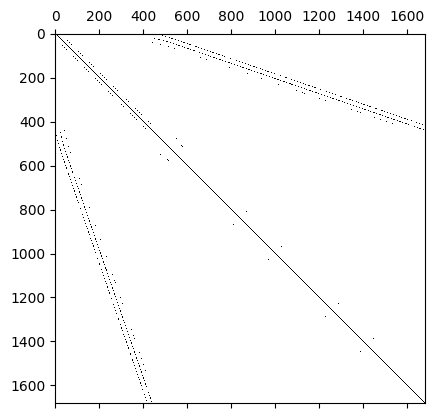

In [4]:
from mfem.common.sparse_utils import sparsemat_to_scipycsr
import matplotlib.pyplot as plt

plt.spy(sparsemat_to_scipycsr(M, float).todense())

In [5]:
Linv = mfem.GSSmoother(M)
GS = mfem.SLISolver()
GS.SetPreconditioner(Linv)
GS.SetOperator(M)
GS.SetRelTol(1e-10)
GS.SetPrintLevel(1)
GS.SetMaxIter(100)
u.Assign(0.0)
GS.Mult(F,u)

   Iteration :   0  ||Br|| = 32.2015
   Iteration :   1  ||Br|| = 7.79566    	Conv. rate: 7.79566
   Iteration :   2  ||Br|| = 1.67135    	Conv. rate: 0.214394
   Iteration :   3  ||Br|| = 0.386499   	Conv. rate: 0.23125
   Iteration :   4  ||Br|| = 0.100165   	Conv. rate: 0.25916
   Iteration :   5  ||Br|| = 0.0288377  	Conv. rate: 0.287902
   Iteration :   6  ||Br|| = 0.00899321 	Conv. rate: 0.311856
   Iteration :   7  ||Br|| = 0.00296643 	Conv. rate: 0.329853
   Iteration :   8  ||Br|| = 0.00101765 	Conv. rate: 0.343057
   Iteration :   9  ||Br|| = 0.000359001	Conv. rate: 0.352773
   Iteration :  10  ||Br|| = 0.000129205	Conv. rate: 0.359901
   Iteration :  11  ||Br|| = 4.71679e-05	Conv. rate: 0.365063
   Iteration :  12  ||Br|| = 1.73928e-05	Conv. rate: 0.368743
   Iteration :  13  ||Br|| = 6.45859e-06	Conv. rate: 0.371336
   Iteration :  14  ||Br|| = 2.41006e-06	Conv. rate: 0.373155
   Iteration :  15  ||Br|| = 9.02416e-07	Conv. rate: 0.374437
   Iteration :  16  ||Br|| = 3.38726

In [6]:
def nnz_mass_matrix(n):
    # Create the mesh and finite element space
    mesh = mfem.Mesh(n, n, "TRIANGLE")
    order_k = 1
    fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
    fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
    m = mfem.BilinearForm(fe_space)
    m.AddDomainIntegrator(mfem.MassIntegrator())
    m.Assemble()
    m.Finalize()
    M = m.SpMat()
    return (M.Width(), M.NumNonZeroElems())

In [7]:
import numpy as np
import matplotlib.pyplot as plt

nrefinements = 6

nnzs = np.zeros(nrefinements)
ns = np.zeros(nrefinements)
mesh_size = 4

for i in range(nrefinements):
    ns[i], nnzs[i] = nnz_mass_matrix(mesh_size)
    mesh_size *= 2


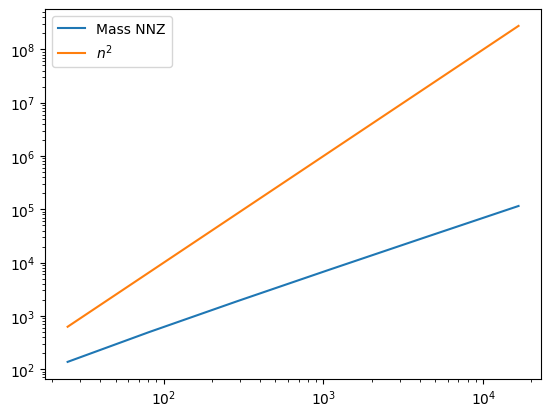

In [8]:
plt.loglog(ns, nnzs, label="Mass NNZ")
plt.loglog(ns, ns**2, label="$n^2$")
plt.legend()

In [9]:
np.log(nnzs[-1]/nnzs[-2]) / np.log(ns[-1]/ns[-2])

np.float64(1.0064109694630328)

In [10]:
def mass_matrix_gauss_seidel(n):
    mesh = mfem.Mesh(n, n, "TRIANGLE")
    order_k = 2
    fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
    fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
    u = mfem.GridFunction(fe_space)
    F = mfem.LinearForm(fe_space)
    F.AddDomainIntegrator(mfem.DomainLFIntegrator(f()))
    # F.Assemble() tells MFEM to actually compute the entries of the vector F
    F.Assemble()
    m = mfem.BilinearForm(fe_space)
    m.AddDomainIntegrator(mfem.MassIntegrator())
    m.Assemble()
    m.Finalize()
    M = m.SpMat()
    Linv = mfem.GSSmoother(M)
    GS = mfem.SLISolver()
    GS.SetPreconditioner(Linv)
    GS.SetOperator(M)
    GS.SetRelTol(1e-10)
    GS.SetMaxIter(100)
    GS.SetPrintLevel(0)
    u.Assign(0.0)
    GS.Mult(F,u)
    print("Gauss-Seidel converged in: ", GS.GetNumIterations(), "iterations")


In [11]:
mesh_size = 4

for i in range(6):
    mass_matrix_gauss_seidel(mesh_size)
    mesh_size *= 2

Gauss-Seidel converged in:  23 iterations
Gauss-Seidel converged in:  22 iterations
Gauss-Seidel converged in:  21 iterations
Gauss-Seidel converged in:  21 iterations
Gauss-Seidel converged in:  20 iterations
Gauss-Seidel converged in:  19 iterations


In [12]:
mesh = mfem.Mesh(80, 80, "TRIANGLE")
order_k = 1
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
F = mfem.LinearForm(fe_space)
F.AddDomainIntegrator(mfem.DomainLFIntegrator(f()))
# F.Assemble() tells MFEM to actually compute the entries of the vector F
F.Assemble()
m = mfem.BilinearForm(fe_space)
m.AddDomainIntegrator(mfem.MassIntegrator())
m.Assemble()
m.Finalize()
M = m.SpMat()
Linv = mfem.GSSmoother(M)
GS = mfem.SLISolver()
GS.SetPreconditioner(Linv)
GS.SetOperator(M)
GS.SetRelTol(1e-10)
GS.SetMaxIter(100)
GS.SetPrintLevel(0)
u.Assign(0.0)
%time GS.Mult(F,u)

CPU times: user 2.25 ms, sys: 35 μs, total: 2.28 ms
Wall time: 2.28 ms


In [13]:
import numpy as np
M_dense = sparsemat_to_scipycsr(M, float).todense()
rhs = F.GetDataArray()
%time np.linalg.solve(M_dense, rhs)

CPU times: user 2.52 s, sys: 121 ms, total: 2.64 s
Wall time: 1.55 s


array([1.35013465, 1.35812419, 1.36500359, ..., 0.9834829 , 0.97043494,
       0.95775   ])

In [14]:
from time import time

def solve_benchmark(n):
    mesh = mfem.Mesh(n, n, "TRIANGLE")
    order_k = 1
    fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
    fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
    u = mfem.GridFunction(fe_space)
    F = mfem.LinearForm(fe_space)
    F.AddDomainIntegrator(mfem.DomainLFIntegrator(f()))
    # F.Assemble() tells MFEM to actually compute the entries of the vector F
    F.Assemble()
    m = mfem.BilinearForm(fe_space)
    m.AddDomainIntegrator(mfem.MassIntegrator())
    m.Assemble()
    m.Finalize()
    M = m.SpMat()
    Linv = mfem.GSSmoother(M)
    GS = mfem.SLISolver()
    GS.SetPreconditioner(Linv)
    GS.SetOperator(M)
    GS.SetRelTol(1e-10)
    GS.SetMaxIter(100)
    GS.SetPrintLevel(0)
    u.Assign(0.0)
    t1 = time()
    GS.Mult(F,u)
    elapsed_gs = time() - t1

    M_dense = sparsemat_to_scipycsr(M, float).todense()
    rhs = F.GetDataArray()
    t1 = time()
    np.linalg.solve(M_dense, rhs)
    elapsed_dense = time() - t1

    return (M.Size(), elapsed_gs, elapsed_dense)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

nrefinements = 6

ns = np.zeros(nrefinements)
t_gs = np.zeros(nrefinements)
t_dense = np.zeros(nrefinements)
mesh_size = 4

for i in range(nrefinements):
    ns[i], t_gs[i], t_dense[i] = solve_benchmark(mesh_size)
    mesh_size *= 2


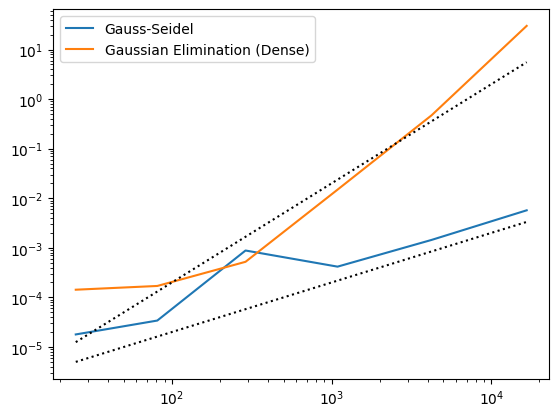

In [16]:
plt.loglog(ns, t_gs, label="Gauss-Seidel")
plt.loglog(ns, t_dense, label="Gaussian Elimination (Dense)")
plt.loglog(ns, 2e-7*ns, 'k:')
plt.loglog(ns, 2e-8*ns**2, 'k:')
plt.legend()